DS Cheat sheet

In [3]:
### importing relevant library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import copy
from sklearn.preprocessing import  StandardScaler
import seaborn as sns
from scipy import stats
from sklearn.metrics import r2_score # library for calculating the R^2 statistic
from sklearn import metrics
from sklearn.linear_model import LinearRegression # library for performing the linear regression
from sklearn.model_selection import train_test_split # library for training and testing datasets
from sklearn.tree import DecisionTreeClassifier  
from sklearn import tree # library for creating the decision tree
from sklearn.tree import DecisionTreeRegressor # used to draw the decision tree regressor

In [6]:
#reading csv into notebook
car_sales = pd.read_csv(r'/home/jeromemugita/Documents/Code/DataScience/Intermediate DS/Datasets/Car_sales.csv')

In [7]:
#copying csv data into df to keep original dataset untampered with
df = car_sales.copy()

In [8]:
# printing out the head to see the first few entries
df.head()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


In [17]:
# printing out the tail to see the last few entries
df.tail()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
152,Volvo,V40,3.545,NaN,Passenger,24.4,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,9/21/2011,66.498812
153,Volvo,S70,15.245,NaN,Passenger,27.5,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,11/24/2012,70.654495
154,Volvo,V70,17.531,NaN,Passenger,28.8,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,6/25/2011,71.155978
155,Volvo,C70,3.493,NaN,Passenger,45.5,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,4/26/2011,101.623357
156,Volvo,S80,18.969,NaN,Passenger,36.0,2.9,201.0,109.9,72.1,189.8,3.600,21.1,24.0,11/14/2011,85.735655


In [14]:
# checking for the basic column attributes including missing values and object datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         157 non-null    object 
 1   Model                157 non-null    object 
 2   Sales_in_thousands   157 non-null    float64
 3   __year_resale_value  121 non-null    float64
 4   Vehicle_type         157 non-null    object 
 5   Price_in_thousands   155 non-null    float64
 6   Engine_size          156 non-null    float64
 7   Horsepower           156 non-null    float64
 8   Wheelbase            156 non-null    float64
 9   Width                156 non-null    float64
 10  Length               156 non-null    float64
 11  Curb_weight          155 non-null    float64
 12  Fuel_capacity        156 non-null    float64
 13  Fuel_efficiency      154 non-null    float64
 14  Latest_Launch        157 non-null    object 
 15  Power_perf_factor    155 non-null    flo

In [16]:
# checking for the summary statistics per column
df.describe()

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
count,157.000000,121.000000,155.000000,156.000000,156.000000,156.000000,156.000000,156.000000,155.000000,156.000000,154.000000,155.000000
mean,52.998076,18.072975,27.390755,3.060897,185.948718,107.487179,71.150000,187.343590,3.378026,17.951923,23.844156,77.043591
std,68.029422,11.453384,14.351653,1.044653,56.700321,7.641303,3.451872,13.431754,0.630502,3.887921,4.282706,25.142664
min,0.110000,5.160000,9.235000,1.000000,55.000000,92.600000,62.600000,149.400000,1.895000,10.300000,15.000000,23.276272
25%,14.114000,11.260000,18.017500,2.300000,149.500000,103.000000,68.400000,177.575000,2.971000,15.800000,21.000000,60.407707
50%,29.450000,14.180000,22.799000,3.000000,177.500000,107.000000,70.550000,187.900000,3.342000,17.200000,24.000000,72.030917
75%,67.956000,19.875000,31.947500,3.575000,215.000000,112.200000,73.425000,196.125000,3.799500,19.575000,26.000000,89.414878
max,540.561000,67.550000,85.500000,8.000000,450.000000,138.700000,79.900000,224.500000,5.572000,32.000000,45.000000,188.144323


In [18]:
# checking for null values for each column
df.isnull()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
153,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
154,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
155,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False


In [19]:
# printing out the sum of all null values
df.isnull().sum()

Manufacturer            0
Model                   0
Sales_in_thousands      0
__year_resale_value    36
Vehicle_type            0
Price_in_thousands      2
Engine_size             1
Horsepower              1
Wheelbase               1
Width                   1
Length                  1
Curb_weight             2
Fuel_capacity           1
Fuel_efficiency         3
Latest_Launch           0
Power_perf_factor       2
dtype: int64

#### To fill in missing values 
 ##### fillna() - use the mean or median in the parentesis depending on the most suitable measure
 ##### ffill() - forward fill method for filling using the value in the cell before missing value
 ##### bfill() - backward fill method for filling using the value in the cell that comes after the missing value
 ##### dropna() - in a case where dropping missing values may result in negligible changes using this method drops the missing values

In [20]:
# checking for duplicate values 
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
152    False
153    False
154    False
155    False
156    False
Length: 157, dtype: bool

##### you may choose to drop the duplicated columns using:
##### drop_duplicates()

In [21]:
#grouping the dataset in terms of vehicle type and horsepower per vehicle
df.groupby('Vehicle_type')['Horsepower'].value_counts()

Vehicle_type  Horsepower
Car           170.0         5
              230.0         4
              150.0         4
              210.0         3
              120.0         2
                           ..
Passenger     135.0         1
              148.0         1
              153.0         1
              154.0         1
              450.0         1
Name: count, Length: 80, dtype: int64

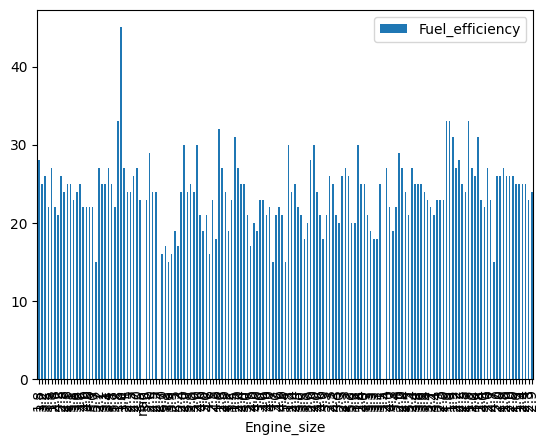

In [10]:
# this plots a bar graph of the data 
# if you choose to plot a line, scatter or pie chart you may replace the kind argument with the respective chart name i.e "line", "scatter" or "pie"

df.plot(kind='bar', x="Engine_size", y="Fuel_efficiency")
plt.show()

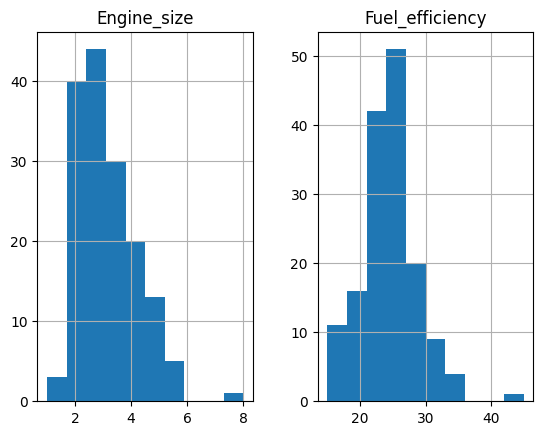

In [11]:
# this plots a histogram for the selected data

df[["Engine_size", "Fuel_efficiency"]].hist()
plt.show()

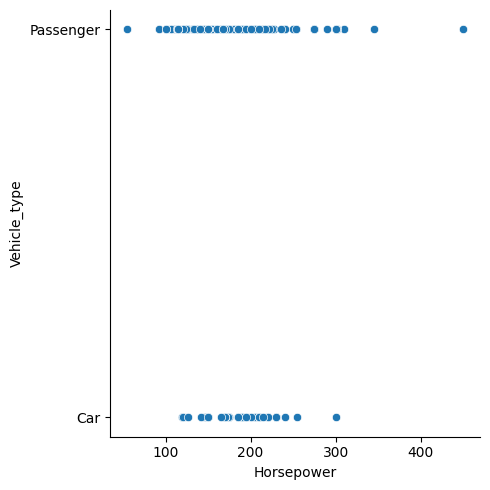

In [28]:
# this uses seOutcomeaborn to create a relative plot for the data

sns.relplot(data=df, x='Horsepower', y='Vehicle_type')
plt.show()

<Axes: >

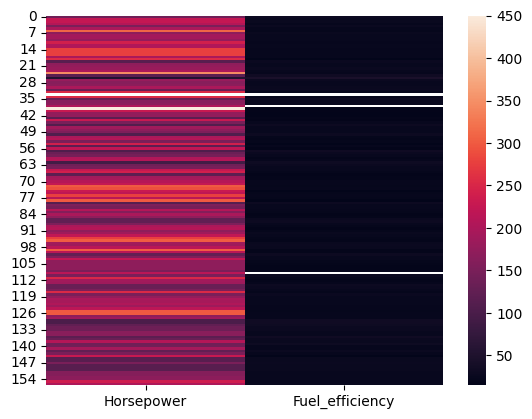

In [13]:
sns.heatmap(df[['Horsepower', 'Fuel_efficiency']])

In [32]:
# replacing values with binary digits to represent each of them
df['Vehicle_type'].replace({'Passanger' : 1, 'Car': 2, }, inplace=True)
df

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Volvo,V40,3.545,NaN,Passenger,24.40,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,9/21/2011,66.498812
153,Volvo,S70,15.245,NaN,Passenger,27.50,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,11/24/2012,70.654495
154,Volvo,V70,17.531,NaN,Passenger,28.80,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,6/25/2011,71.155978
155,Volvo,C70,3.493,NaN,Passenger,45.50,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,4/26/2011,101.623357


Polynormial Regression

In [ ]:
# creating a polynormial line
# model = numpy.poly1d(numpy.polyfit(x, y, 3))

# y
# #   starting at position 1, and ending at position 22:
# line = numpy.linspace(1, 22, 100)

LINEAR REGRESSION

#find the correlation of a model

corr = df.corr()
corr.shape

In [ ]:
# spliting our data into X independent variables and Y dependent variables and droping the y value from the rest of the dataset
X = df.drop(['label'], axis = 1)
y = df['label']

In [ ]:
# this is used to create the linear regression model when using multiple regression
regr = linear_model.LinearRegression()
regr.fit(X, y)

In [ ]:
#Algorithm for training and testing data... we use a testing site of 0.2 and 0.8 for training data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 5)

In [ ]:
print(X_train.shape)     # => X : For training : inputs or features
print(X_test.shape)
print(y_train.shape)     # => y : For training : Output or label
print(y_test.shape)

In [ ]:
# Create a Linear regressor
lm = LinearRegression()

# Train the model using the training sets 
lm.fit(X_train, y_train)

In [ ]:
# Printing out the value of y intercept
lm.intercept_

In [ ]:
## prints out  the coefficients for our linear regression
lm.coef_

In [ ]:
#Converting the coefficient values to a dataframe
coefficients = pd.DataFrame([X_train.columns,lm.coef_]).T
coefficients = coefficients.rename(columns={0: 'Attribute', 1: 'Coefficients'})
coefficients

In [ ]:
# use this to predict future or unmentioned infromation from the training dataset
y_pred = lm.predict(X_train)

In [ ]:
# Evaluate the model using statistical inferences
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

In [ ]:
#Evaluate the accuracy of the model to check for overfitting or underfitting if they are within each other the model is said to be accurate

print(f'Train Accuracy {round(lm.score(X_train, y_train)* 100,2)}%')
print(f'Test Accuracy {round(lm.score(X_test, y_test)* 100,2)}%')

In [ ]:
# creating a random list of values with a binormial distribution
dataset = numpy.random.binomial(1, 0.9, size = 1000) 

In [ ]:
# Create Decision Tree classifier object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifier
clf  = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf .predict(X_test)

In [ ]:
#Check for the accuracy of the decision tree model
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [ ]:
# This plots and displays the decision tree

plt.figure(figsize=(15,10))
tree.plot_tree(clf,
               feature_names = df[['labels', '...']], 
               class_names=df['label'],
               rounded=True, 
               filled = True);
plt.savefig 

In [ ]:
# working out the logistic regression of a Decision Tree

regressor = DecisionTreeRegressor()
regressor.fit(X_train.reshape(-1,1), y_train.reshape(-1,1))

In [ ]:
# creating a confusion matrix
confusion_matrix = metrics.confusion_matrix()
